# Transfer Learning:

In transfer learning, the knowledge of an already trained machine learning model is applied to a different but related problem. For example, if you trained a simple classifier to predict whether an image contains a watch, you could use the knowledge that the model gained during its training to recognize other objects like clock.


#### Pre trained model as Feature Extractor
Remove the last dense layer which is performing classification and use this pre trained model as Feature Extractor.Fixed feature extractor for the new dataset.

For example, if you want to build a self learning car. You can spend years to build a decent image recognition algorithm from scratch or you can take inception model (a pre-trained model) from Google which was built on ImageNet data to identify images in those pictures.


# Dataset Prepration 

In [30]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])
    
    
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

['earphone', 'headphone', 'phones']
Types of classes labels found:  3
     Labels                         image
0  earphone  dataset_path/earphone/21.png
1  earphone  dataset_path/earphone/22.png
2  earphone  dataset_path/earphone/23.png
3  earphone  dataset_path/earphone/24.png
4  earphone  dataset_path/earphone/25.png
     Labels                           image
98   phones  dataset_path/phones/phs112.png
99   phones  dataset_path/phones/phs123.jpg
100  phones  dataset_path/phones/phs123.png
101  phones  dataset_path/phones/phs157.png
102  phones  dataset_path/phones/phs165.png


In [31]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  103
headphone    50
phones       29
earphone     24
Name: Labels, dtype: int64


In [32]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [33]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(103, 224, 224, 3)

In [34]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'pho

In [35]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [36]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(97, 224, 224, 3)
(97, 3)
(6, 224, 224, 3)
(6, 3)


## Transfer learning from pre-trained weights

#### Here we initialize the model with pre-trained ImageNet weights,and we fine-tune it on our own dataset.



The first step to transfer learning is to freeze all layers and train only the top layers. For this step, a relatively large learning rate (1e-2) can be used. 

EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

include_top=False means we don't want to use classification layer(Dense from the pretrained network)

In [37]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os


NUM_CLASSES = 3
IMG_SIZE = 224



In [38]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #x = img_augmentation(inputs)
    x = inputs
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [39]:

model = build_model(num_classes=NUM_CLASSES)

In [40]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


#plot_hist(hist)

Epoch 1/30
4/4 - 1s - loss: 2.5313 - accuracy: 0.3093
Epoch 2/30
4/4 - 1s - loss: 3.7580 - accuracy: 0.2784
Epoch 3/30
4/4 - 1s - loss: 2.7970 - accuracy: 0.2887
Epoch 4/30
4/4 - 1s - loss: 2.4532 - accuracy: 0.3505
Epoch 5/30
4/4 - 1s - loss: 1.9094 - accuracy: 0.3402
Epoch 6/30
4/4 - 1s - loss: 2.9794 - accuracy: 0.3608
Epoch 7/30
4/4 - 1s - loss: 2.2961 - accuracy: 0.3711
Epoch 8/30
4/4 - 1s - loss: 2.7463 - accuracy: 0.3918
Epoch 9/30
4/4 - 1s - loss: 1.7156 - accuracy: 0.4330
Epoch 10/30
4/4 - 1s - loss: 2.0100 - accuracy: 0.2887
Epoch 11/30
4/4 - 1s - loss: 1.6033 - accuracy: 0.4227
Epoch 12/30
4/4 - 1s - loss: 1.5589 - accuracy: 0.4021
Epoch 13/30
4/4 - 1s - loss: 1.4422 - accuracy: 0.4536
Epoch 14/30
4/4 - 1s - loss: 1.3959 - accuracy: 0.3093
Epoch 15/30
4/4 - 1s - loss: 1.4293 - accuracy: 0.2784
Epoch 16/30
4/4 - 1s - loss: 1.4343 - accuracy: 0.3918
Epoch 17/30
4/4 - 1s - loss: 1.8570 - accuracy: 0.4227
Epoch 18/30
4/4 - 1s - loss: 1.6215 - accuracy: 0.4330
Epoch 19/30
4/4 - 1

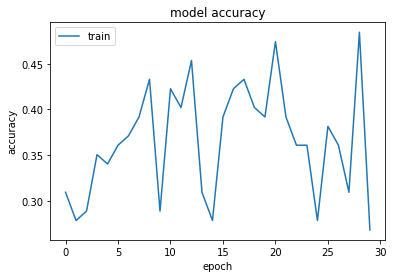

In [41]:
epochs = 30 
hist = model.fit(train_x, train_y, epochs=epochs, verbose=2)
plot_hist(hist)

In [42]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 0s 6ms/step - loss: 1.0760 - accuracy: 0.3333
Loss = 1.0759620666503906
Test Accuracy = 0.3333333432674408


Input image shape: (1, 224, 224, 3)
predicted class:  [[0.5195962  0.35020834 0.13019536]]


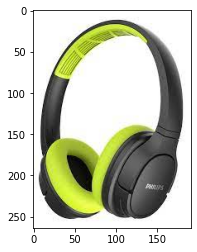

In [43]:
img_path = 'unseen.jfif'


img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)



preds=model.predict(x)
print("predicted class: ", preds )    # probabilities for being in each of the 3 classes